In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [3]:
df=pd.read_excel(r"C:/Users/91836/Desktop/Curriculum and courses/Semesters/sem 7/Data Analytics Laboratory/A5/car_evaluation.xlsx", thousands=',')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.columns=['buying', 'maintenance', 'doors', 'persons', 'lug_boot' , 'safety' , 'target']
df.head()

,buying,maintenance,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   lug_boot     1727 non-null   object
 5   safety       1727 non-null   object
 6   target       1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.isnull().sum()

buying         0
maintenance    0
doors          0
persons        0
lug_boot       0
safety         0
target         0
dtype: int64

In [7]:
df['target'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: target, dtype: int64

<AxesSubplot:>

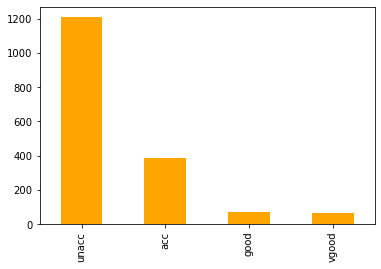

In [8]:
df['target'].value_counts().plot(kind='bar',color='orange')

In [9]:
sns.countplot(df[df['target']=='unacc'][''])
plt.show()

KeyError: ''

In [10]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [11]:
print(y)

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: target, Length: 1727, dtype: object


In [12]:
from sklearn.preprocessing import OrdinalEncoder     

In [13]:
buying_price_category = ['low', 'med', 'high', 'vhigh']
maint_cost_category = ['low', 'med', 'high','vhigh']
doors_category=[2,3, 4, '5more']
person_capacity_category = [2, 4, 'more']
lug_boot_category = ['small', 'med', 'big']
safety_category = ['low', 'med', 'high']
all_categories = [buying_price_category, maint_cost_category,doors_category,person_capacity_category,lug_boot_category,safety_category]


In [14]:
oe = OrdinalEncoder(categories= all_categories)

In [15]:
X = oe.fit_transform( df[['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety']])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.95      1.00      0.97       121
        good       0.95      0.90      0.92        20
       unacc       1.00      0.99      0.99       357
       vgood       1.00      0.90      0.95        21

    accuracy                           0.98       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.99      0.98      0.98       519

